In [ ]:
# Import library 
import  pandas  as  pd 
import  seaborn  as  sns 
import  numpy  as  np 
import  matplotlib.pyplot  as  plt 
% matplotlib inline


# Add library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score

In [ ]:
# Carregar conjunto de dados de preços de imóveis em Boston da coleção 'sklearn.datasets' 

from sklearn.datasets import load_boston
boston = load_boston()

In [ ]:
# Converta em um DataFrame 
df = pd.DataFrame(boston.data)
print(df.head())
# Altere os nomes das colunas de números de índice para 'feature_names' 
df.columns = boston.feature_names
print(df.head())

#Adicione uma coluna chamada 'PRICE' de boston.target 
df['PRICE'] = boston.target
df.head()

        0     1     2    3      4   ...   8      9     10      11    12
0  0.00632  18.0  2.31  0.0  0.538  ...  1.0  296.0  15.3  396.90  4.98
1  0.02731   0.0  7.07  0.0  0.469  ...  2.0  242.0  17.8  396.90  9.14
2  0.02729   0.0  7.07  0.0  0.469  ...  2.0  242.0  17.8  392.83  4.03
3  0.03237   0.0  2.18  0.0  0.458  ...  3.0  222.0  18.7  394.63  2.94
4  0.06905   0.0  2.18  0.0  0.458  ...  3.0  222.0  18.7  396.90  5.33

[5 rows x 13 columns]
      CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33

[5 rows x 13 columns]


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
# Construir modelo com um único recurso, selecionando "o recurso mais importante", 


In [ ]:
# Plotar "O recurso mais importante Vs Price"


In [ ]:
# Selecionar y e X (considerar somente o recurso mais importante)
X = df.drop('PRICE', axis=1)
y = df['PRICE']

In [ ]:
# Dividir os dados em treino e teste, considerando o tamanho de teste 30% e random seed 101

SEED = 101
np.random.seed(SEED)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [ ]:
#Normalização dos dados
scaler = MinMaxScaler(feature_range=(0, 1))

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [ ]:
# Realizar o treinamento utilizando regressão linear

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### **Avaliação do modelo de treinamento**

In [ ]:
#Avaliação do modelo de treinamento
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=10)

scores = np.absolute(scores)
print('Mean MSE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

r_scores = cross_val_score(model, X_train, y_train, cv = 10, scoring='r2')
print('Mean R: %.3f (%.3f)' % (np.mean(r_scores), np.std(r_scores)))

Mean MSE: 3.230 (0.636)
Mean R: 0.700 (0.114)


### **Avaliação do modelo de teste**

In [ ]:
# Predizer utilizando os dados de treinamento e plotar o resultado obtido
scores = cross_val_score(model, X_test, y_test, scoring='neg_mean_absolute_error', cv=10)

scores = np.absolute(scores)
print('Mean MSE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

r_scores = cross_val_score(model, X_test, y_test, cv = 10, scoring='r2')
print('Mean R: %.3f (%.3f)' % (np.mean(r_scores), np.std(r_scores)))

Mean MSE: 4.185 (0.975)
Mean R: 0.530 (0.397)




---


# Explique o que pode ser observado com os resultados obtidos.

---





In [ ]:
# Tente encontrar o melhor modelo de regressão polinomial. 

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_squared_error
poly_degrees = [1, 2, 4, 6, 8, 16]

train_errors, test_errors = [], []

for i in poly_degrees:
    poly_features = PolynomialFeatures(degree = i, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    poly_regression = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg)
    ])
    # faltando instrução de código

    y_train_pred = # faltando completar instrução
    y_test_pred = # faltando completar instrução
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))
    
plt.plot(poly_degrees, train_errors, "r-+", label="train")
plt.plot(poly_degrees, test_errors, "b-", label="test")
plt.legend(loc="upper left", fontsize=14)
plt.xlabel("degree of polynomial", fontsize=14)
plt.ylabel("RMSE", fontsize=14)

SyntaxError: ignored

Text(0, 0.5, 'RMSE')

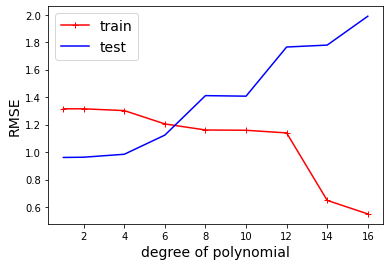

In [ ]:
# Tente encontrar o melhor modelo de regressão polinomial. 

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

#Add library
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_squared_error
poly_degrees = [1, 2, 4, 6, 8, 10, 12, 14, 16]

#Gera pontos no espaço 
x = np.linspace(-1, 1, 50).reshape(50, 1)

#Forma parábola
y = 0.5*x**2 + x + 5

#Forma ruído que corrompe o sinal
noise = np.random.randn(50, 1)
y_noise = y + noise

X_train, X_test, y_train, y_test = train_test_split(x, y_noise, test_size = 0.3)

#Aqui vai recebe os dados do append
train_errors, test_errors = [], []

for i in poly_degrees:
    poly_features = PolynomialFeatures(degree = i, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    poly_regression = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg)
    ])
    

    poly_regression.fit(X_train, y_train)

    y_train_pred = poly_regression.predict(X_train)
    y_test_pred = poly_regression.predict(X_test)


    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))
    
plt.plot(poly_degrees, train_errors, "r-+", label="train")
plt.plot(poly_degrees, test_errors, "b-", label="test")
plt.legend(loc="upper left", fontsize=14)
plt.xlabel("degree of polynomial", fontsize=14)
plt.ylabel("RMSE", fontsize=14)

###**Conclusão:** 

###Isso mostra que nem sempre o maior grau de polinômios é o melhor para o modelo, para graus de 1 a 12, observamos uma convergência entre os dados de treinamento e teste. Acima disso, os valores os divergentes.

###Nota-se que o RMSE do treinamento cai com graus mais altos, porém para dados de teste, o RMSE sobe muito rápido para graus acima de 12.



---


# Explique o que pode ser observado com os resultados obtidos.

---


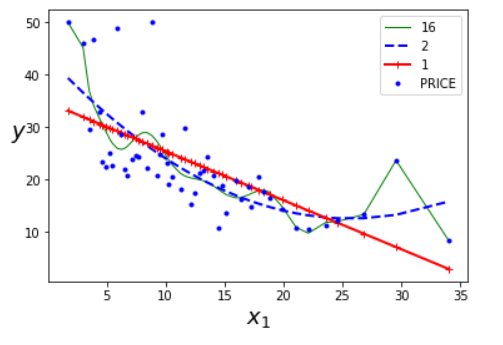


---

# O gráfico mostra três modelos com polinómios de 1, 2 e 16 grau. Qual obteve o melhor resultado e porque?

---



# Repita todo o processo para "os dois recurso mais importantes".  

### **Conclusão 1:** Pode ser observado que, considerando esses dados do gráfico como os pontos de **treinamento**, quanto maior o grau, mais convergente o modelo fica em aprender os pontos. Porém, graus muito grande podem apresentar erros grandes para dados desconhecidos.

### **Conclusão 2:**

### O polinômio de grau 1 não tem "flexibilidade" para aprender com os pontos, o de grau 2 produz uma aproximação simples, e o de grau 16 temos uma maior aproximação com o modelo.

### Nota-se que o modelo com grau de 16 produz maior aproximação como os pontos, porém é preciso verificar se os pontos são de **treinamento** ou **teste**. Esse caso com grau 16, apresenta ser um caso de overfitting. É bem possível que o grau 2 forneça melhor resultado para dados desconhecidos.